<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Structured_Dataset/blob/main/banknote_binary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Building and training neural network models using TensorFlow 2.x
You need to understand the foundational principles of machine learning (ML) and deep learning (DL)

using TensorFlow 2.x. You need to know how to:

❏ Use TensorFlow 2.x.

❏ Build, compile and train machine learning (ML) models using TensorFlow.

❏ Preprocess data to get it ready for use in a model.

❏ Use models to predict results.

❏ Build sequential models with multiple layers

❏ Build and train models for binary classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# TensorFlow 2.x.
tf.__version__

'2.8.0'

In [3]:
# Check for GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [11]:
## calling the dataset:
banknote=pd.read_csv("/content/data_banknote_authentication.csv",header=None)

**Attribute Information:**
---
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)


**Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. 

For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.




**OBJECTIVE:**
>There are 1372 items. There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery).

In [12]:
banknote[800:810]

,0,1,2,3,4
800,-2.06310,-1.514700,1.219000,0.445240,1
801,-0.91318,-2.011300,-0.195650,0.066365,1
802,0.60050,1.932700,-3.288800,-0.324150,1
803,0.91315,3.337700,-4.055700,-1.674100,1
804,-0.28015,3.072900,-3.385700,-2.915500,1
805,-3.60850,3.325300,-0.519540,-3.573700,1
806,-6.20030,8.680600,0.009134,-3.703000,1
807,-4.29320,3.341900,0.772580,-0.997850,1
808,-3.02650,-0.062088,0.686040,-0.055186,1
809,-1.70150,-0.010356,-0.993370,-0.531040,1


**Data Standardization**
>Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

* This can be thought of as subtracting the mean value or centering the data.

Like ```normalization```, ```standardization``` can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

```Standardization``` assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, **but you may not get reliable results.**

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# retrieve numpy array
data = banknote.values
# split into input and output elements
x, y = data[:, :-1], data[:, -1]

scaler = MinMaxScaler() ### scale x dataset between 0 to 1
x_scaled =scaler.fit_transform(x)

In [22]:
#split into input and output elements
split_data=int(len(banknote)*.80)
x_train,y_train = x_scaled[:split_data],y[:split_data]
x_test,y_test   = x_scaled[split_data:],y[split_data:]

In [23]:
x_train,y_train

(array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
        [0.83565902, 0.82098209, 0.12180412, 0.64432563],
        [0.78662859, 0.41664827, 0.31060805, 0.78695091],
        ...,
        [0.65333997, 0.58265575, 0.10028647, 0.79635742],
        [0.5917761 , 0.66178853, 0.03152045, 0.42563445],
        [0.19293425, 0.74247045, 0.25236091, 0.28018586]]),
 array([0., 0., 0., ..., 1., 1., 1.]))

In [21]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((1097, 4), (1097,), (275, 4), (275,))

In [39]:
## callback
# Create a function to implement a ModelCheckpoint callback with a specific filename 
callbacks= tf.keras.callbacks.ModelCheckpoint(filepath=("/content/callback/dataset_banknote_model"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='loss',
                                             patience=10,
                                             verbose=0)

In [45]:
# build the model with 3 layers:
banknote_dataset=tf.keras.Sequential([
                                      tf.keras.layers.Dense(32,activation="relu"),
                                      tf.keras.layers.Dense(32,activation="relu"),
                                      tf.keras.layers.Dense(1,activation="sigmoid")
                                      ])


# Compile the model
banknote_dataset.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])


# Fit the model for 200 epochs (same as insurance_model_2)
history=banknote_dataset.fit(x_train,
                             y_train,
                             epochs=20,
                             verbose=0,
                             callbacks=[Early_stop])

In [46]:
banknote_dataset.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9527


[0.13454675674438477, 0.9527272582054138]

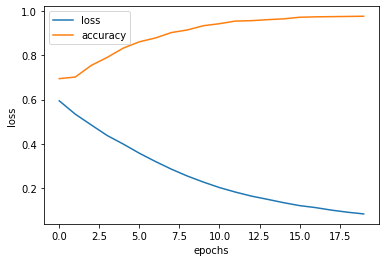

In [48]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 20 since we overrid the history variable

In [78]:
## model prediction on x_dataset
model_preds=banknote_dataset.predict(x_test)
preds=tf.math.round(model_preds)
preds[:10],y_test[:20]

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32)>,
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

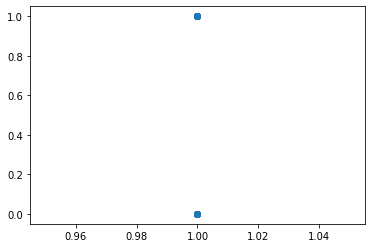

In [77]:
# plot the y_test and model_preds
plt.scatter(y_test,preds)

In [82]:
# Save a model using the SavedModel format
banknote_dataset.save('best_model_SavedModel_format.h5')

In [83]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format.h5")
loaded_saved_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                160       
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [84]:
loaded_saved_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9527


[0.13454675674438477, 0.9527272582054138]

In [101]:
pred_df = pd.DataFrame({
                        "y_true": y_test,
                        "y_pred":tf.squeeze( model_preds),
                        "y_pred_round":tf.squeeze(preds)
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred_round"]
pred_df[:10]


,y_true,y_pred,y_pred_round,pred_correct
0,1.0,0.976168,1.0,True
1,1.0,0.966357,1.0,True
2,1.0,0.936680,1.0,True
3,1.0,0.827319,1.0,True
4,1.0,0.249154,0.0,False
5,1.0,0.211868,0.0,False
6,1.0,0.973872,1.0,True
7,1.0,0.988146,1.0,True
8,1.0,0.982594,1.0,True
9,1.0,0.960331,1.0,True
